In [53]:
import polars as pl
import pandas as pd
import preprocessing.feature_engineering as fe
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
import re

plt.style.use("cyberpunk")
plt.style.use('dark_background')

In [3]:
df_selected = pl.read_parquet("./data/2022_data_selected.parquet")

In [4]:
df_failure = df_selected.filter(pl.col("failure") == 1)

In [5]:
df_failure

date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,smart_10_normalized,smart_10_raw,smart_12_normalized,smart_12_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,smart_192_normalized,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""2022-03-11""","""71A0A2NWFVGG""","""TOSHIBA MG08AC...",16000900661248,1,100,0,100,8070,100,22,100,0,100,0,93,2960,100,0,100,22,null,null,null,null,100,21,100,1070,100,31,100,1091,100,0,200,0
"""2022-03-11""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,1,78,58136744,89,0,100,19,73,44320,78,66557216,76,21676,100,0,100,19,1,233,100,0,100,288,100,1590,34,34,100,0,100,0,200,0
"""2022-03-11""","""ZHZ63CSQ""","""ST12000NM0008""",12000138625024,1,83,213282896,93,0,100,6,97,7272,88,589048613,80,17927,100,0,100,5,50,50,100,0,100,1,99,2743,28,28,100,24,100,24,200,0
"""2022-03-11""","""Z302CYGC""","""ST4000DM000""",4000787030016,1,117,167391432,92,0,100,15,100,0,87,477518379,37,55793,100,0,100,15,100,0,100,0,100,2,96,8628,22,22,100,0,100,0,200,0
"""2022-03-11""","""ZA180XHR""","""ST8000NM0055""",8001563222016,1,79,75517896,89,0,100,20,89,43456,93,1836902583,54,40362,100,0,100,20,54,46,100,0,100,79,89,23961,40,40,100,0,100,0,200,0
"""2022-03-11""","""ZLW0WT2G""","""ST12000NM001G""",12000138625024,1,73,18496656,96,0,100,4,100,16,84,256973842,90,8763,100,0,100,4,100,0,100,0,100,2,100,571,26,26,100,0,100,0,200,0
"""2022-03-11""","""ZHZ3CMBS""","""ST14000NM0138""",14000519643136,1,83,217136352,90,0,100,26,100,0,89,793024464,87,11586,100,0,100,24,100,0,100,0,100,51,98,4266,31,31,100,0,100,0,200,0
"""2022-03-11""","""ZA1JXEFV""","""ST8000NM0055""",8001563222016,1,67,5545842,99,0,100,1,100,0,100,43698,100,0,100,0,100,1,100,0,100,0,100,0,100,2,35,35,100,0,100,0,200,0
"""2022-03-11""","""ZA1814DD""","""ST8000NM0055""",8001563222016,1,79,77378264,89,0,100,12,100,40,92,1741580269,55,39712,100,0,100,12,100,0,100,0,100,65,88,25482,36,36,100,0,100,0,200,0


In [6]:
df_all_modelcounts = df_failure['model'].value_counts()
df_all_modelcounts.sort(by="counts", descending=True)

model,counts
str,u32
"""ST4000DM000""",633
"""ST12000NM0008""",404
"""TOSHIBA MG07AC...",385
"""ST8000NM0055""",348
"""ST8000DM002""",189
"""ST16000NM001G""",142
"""ST14000NM001G""",126
"""ST12000NM001G""",116
"""TOSHIBA MG08AC...",93


In [7]:
df_ST4000DM000 = df_failure.filter((pl.col("model") == "ST4000DM000"))

In [8]:
failed_st4000 = df_ST4000DM000.select(
    [
        
        pl.col("serial_number").unique().alias("serial_number"),
    ])

In [9]:
df_ZJV3BYAY = df_selected.filter(pl.col("serial_number")=="ZJV3BYAY")

In [10]:
df_sorted1 = df_ZJV3BYAY.sort(by='date')

smart statistics for hard drive with serial number ZJV3BYAY

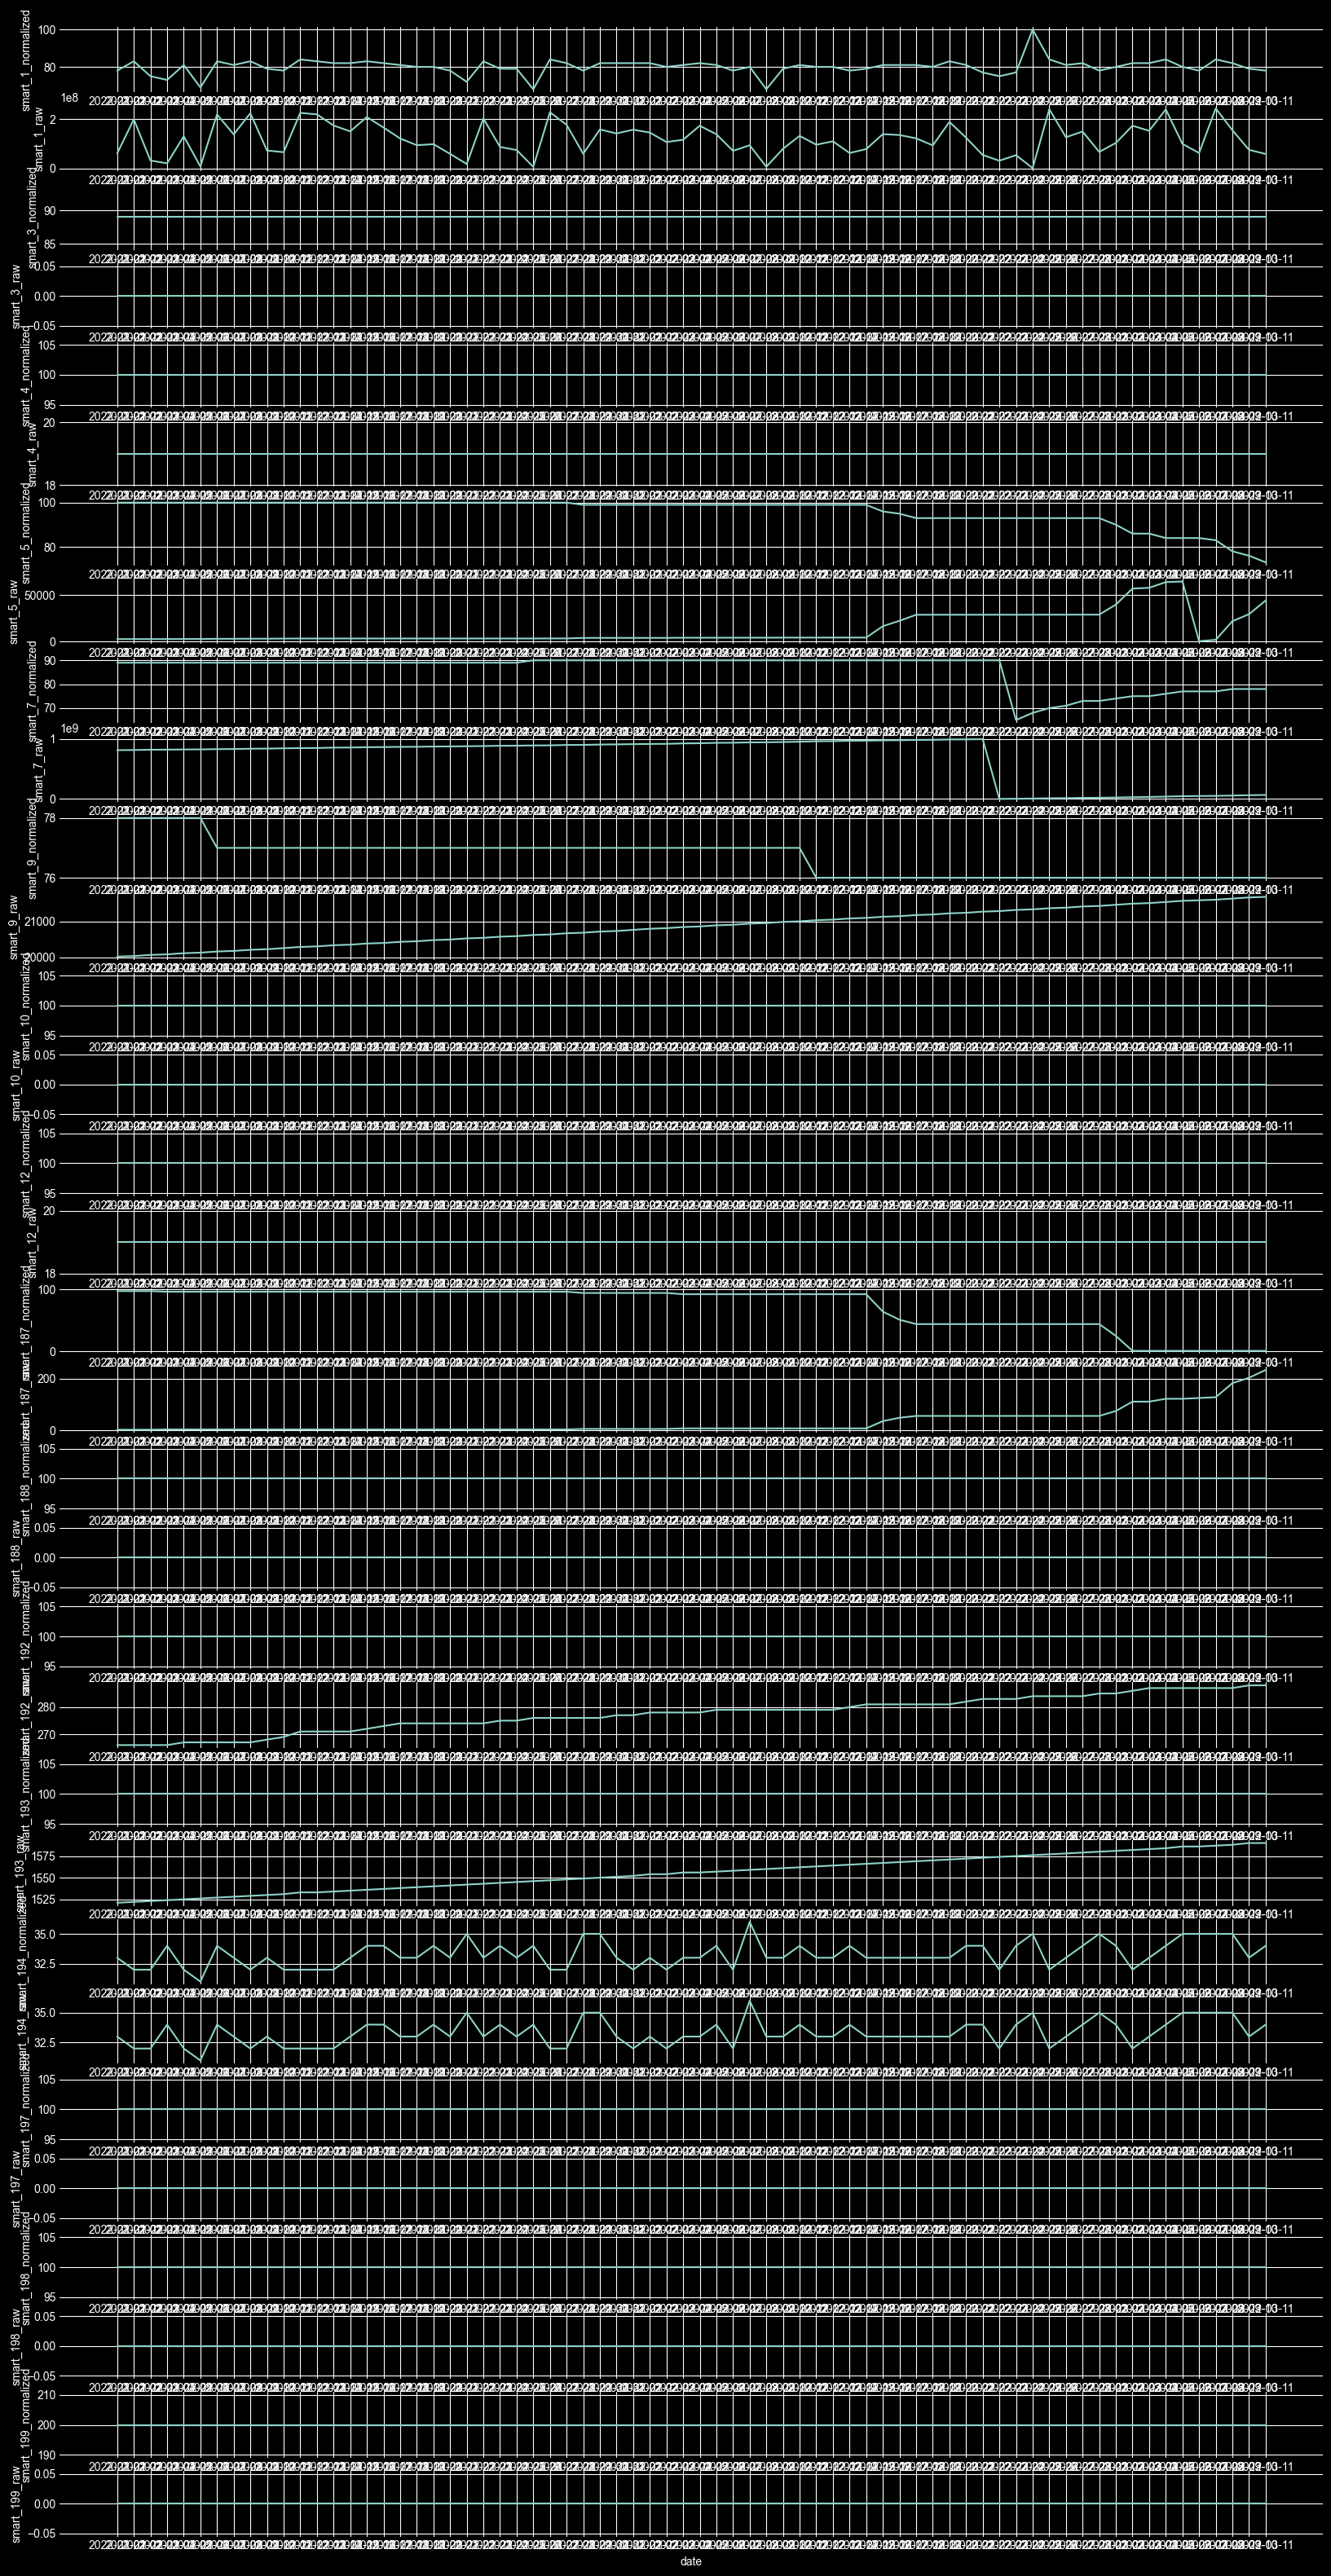

In [11]:
fig, ax = plt.subplots(32, figsize=(20,40))
for i in range(32):
    graph1 = sns.lineplot(data=df_sorted1, x='date', y=df_sorted1.columns[i+5], ax=ax[i])

plt.savefig("./images/ZJV3BYAY.png")

In [12]:
df_S3010LL5 = df_selected.filter(pl.col("serial_number")=="S3010LL5")
df_sorted2 = df_S3010LL5.sort(by='date')



smart statistics for hard drive with serial number S3010LL5


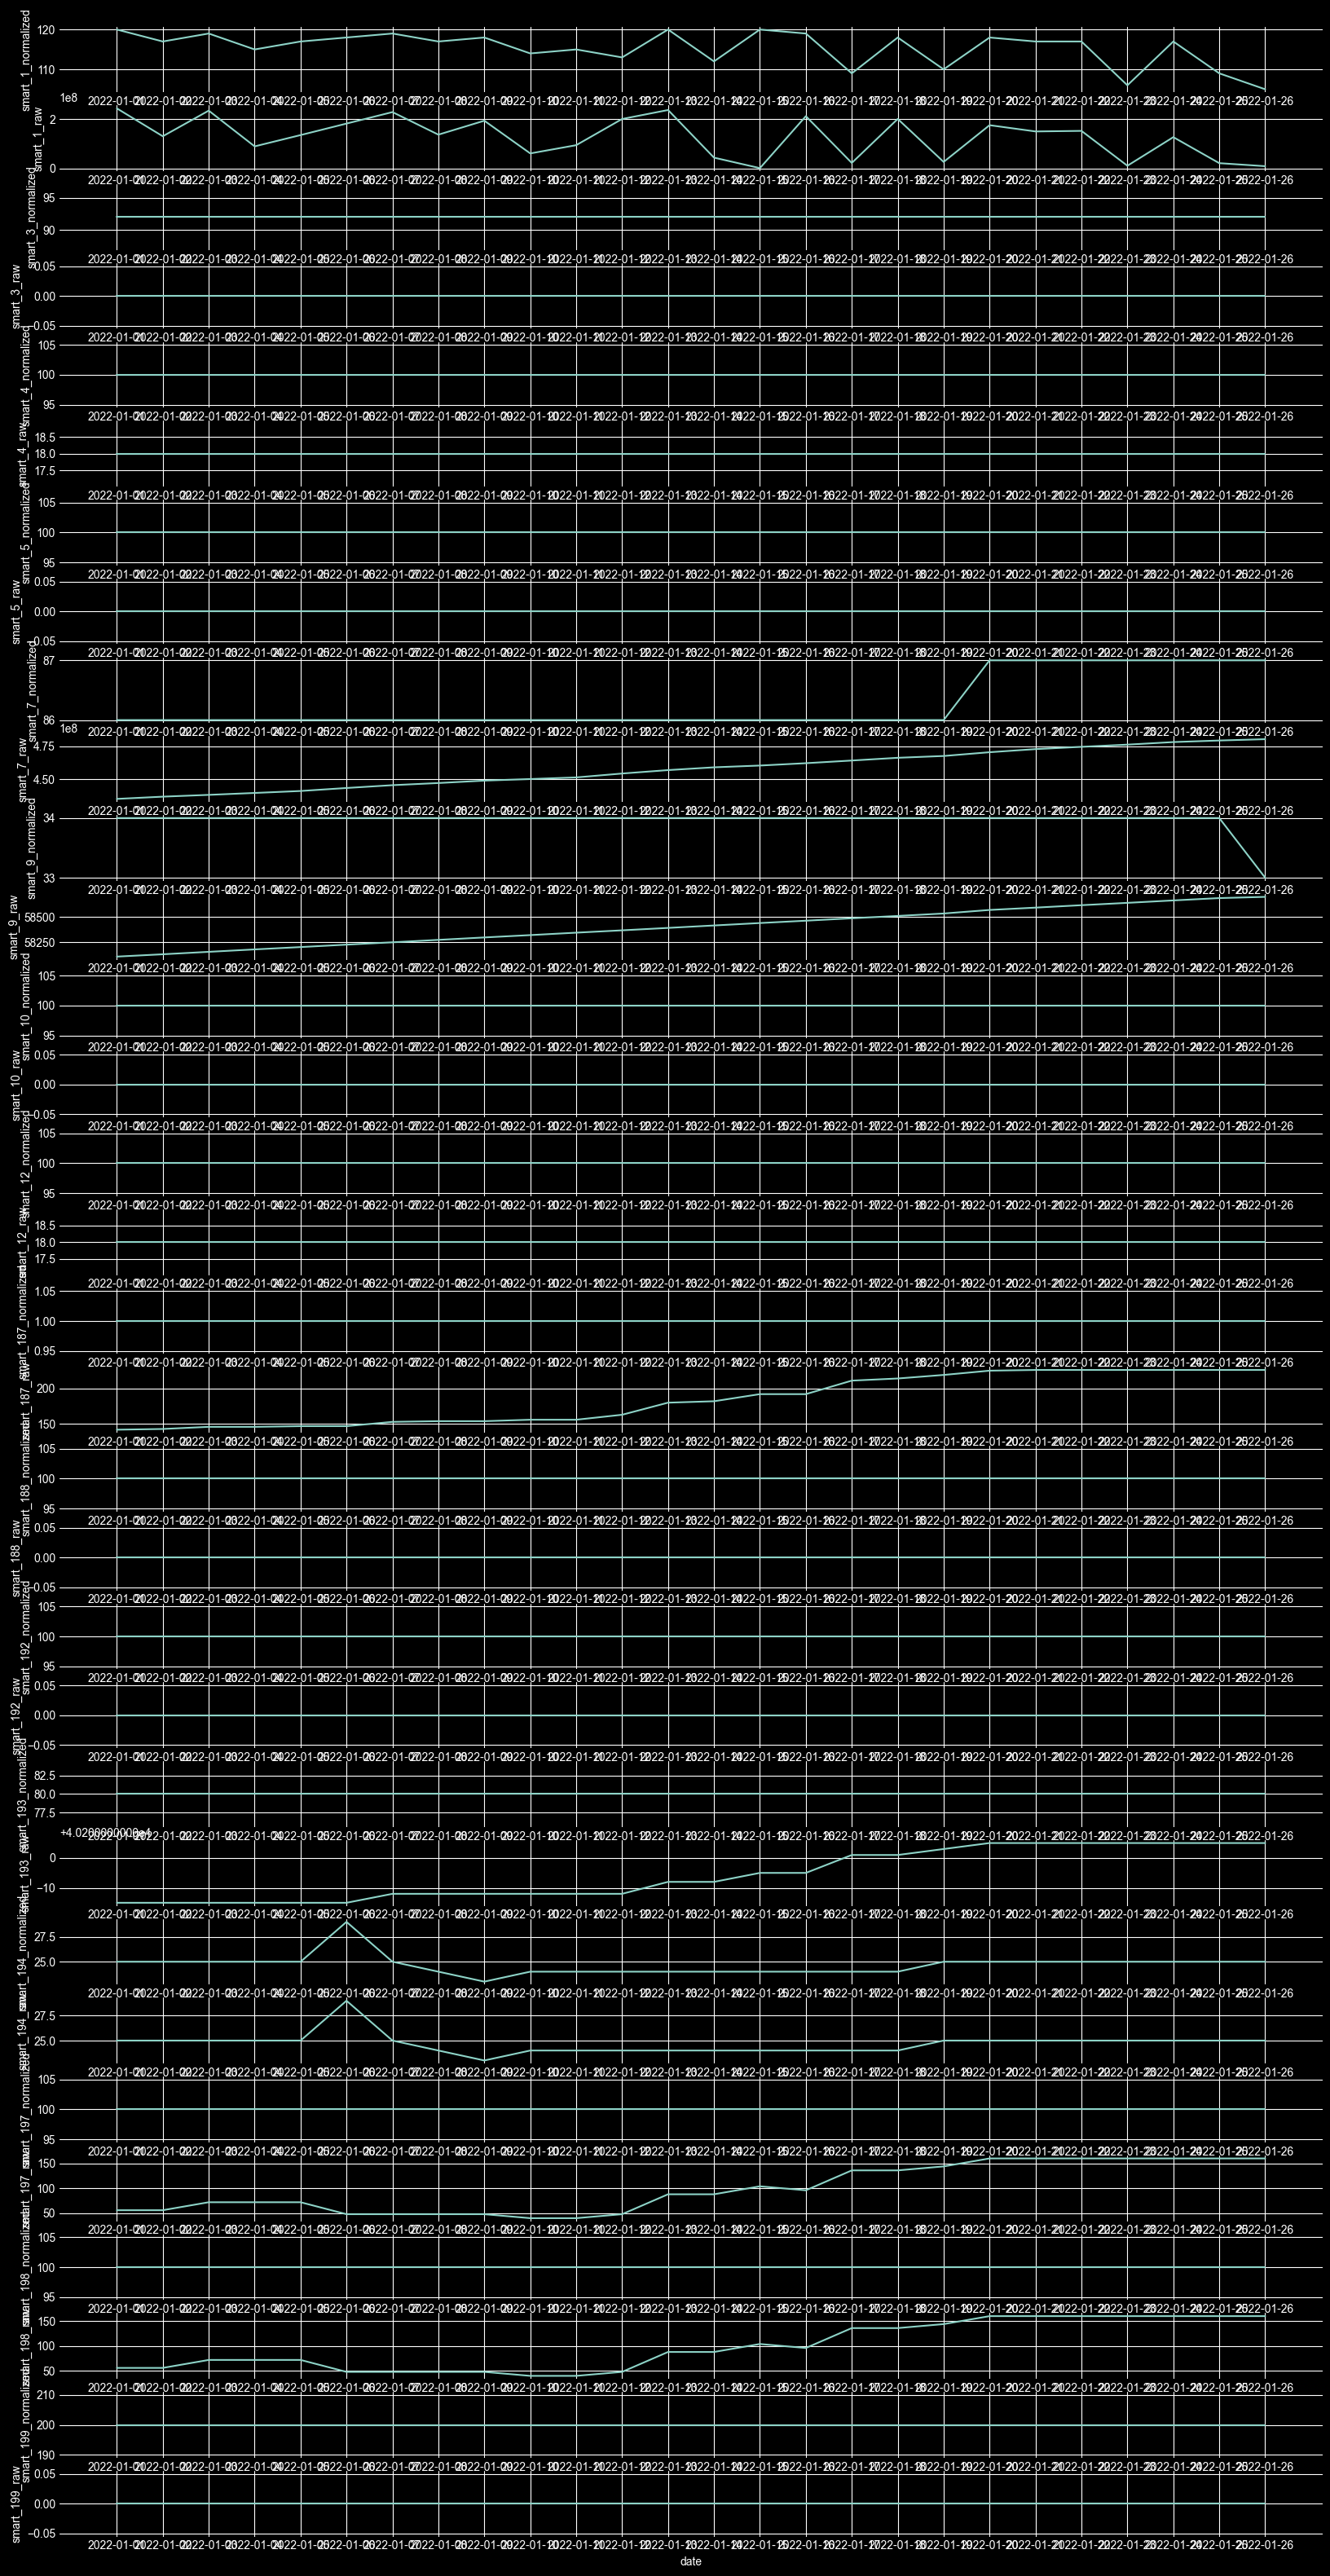

In [13]:
fig, ax = plt.subplots(32, figsize=(20,40))
for i in range(32):
    graph1 = sns.lineplot(data=df_sorted2, x='date', y=df_sorted2.columns[i+5], ax=ax[i])

plt.savefig("./images/S3010LL5.png")

In [14]:
list(failed_st4000)[0][:]

serial_number
str
"""Z303XYRK"""
"""Z30565J0"""
"""Z304K6DT"""
"""Z304KQWH"""
"""Z304HWL0"""
"""S301NJC1"""
"""Z302BVBW"""
"""Z3051FR1"""
"""Z304HS6R"""


In [15]:
failed_st4000_list = failed_st4000.to_series().to_list()

In [16]:
#hard drive model ST4000DM000 thats not failed: hard drives that failed are listed in failed_st4000
df_nofailure = df_selected.filter((pl.col("model") == "ST4000DM000") & ~ pl.col("serial_number").is_in(failed_st4000_list))

In [17]:
df_nofailure

date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,smart_10_normalized,smart_10_raw,smart_12_normalized,smart_12_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,smart_192_normalized,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""2022-03-11""","""Z305DEMX""","""ST4000DM000""",4000787030016,0,114,61208648,92,0,100,16,100,0,84,274860655,38,54806,100,0,100,15,100,0,100,0,100,1,83,34459,19,19,100,0,100,0,200,0
"""2022-03-11""","""S301NGZV""","""ST4000DM000""",4000787030016,0,117,145639880,91,0,100,19,100,0,84,302259307,37,55790,100,0,100,19,100,0,100,0,100,0,92,17578,27,27,100,0,100,0,200,0
"""2022-03-11""","""S3010M7R""","""ST4000DM000""",4000787030016,0,117,140768432,91,0,100,19,100,0,87,610381474,32,59756,100,0,100,19,100,0,100,0,100,0,82,37679,24,24,100,0,100,0,200,0
"""2022-03-11""","""S3010M7H""","""ST4000DM000""",4000787030016,0,117,122568920,91,0,100,26,100,0,84,269858269,33,59457,100,0,100,26,99,1,100,0,100,0,17,166861,24,24,100,0,100,0,200,0
"""2022-03-11""","""S3010M7E""","""ST4000DM000""",4000787030016,0,119,215212568,92,0,100,19,100,0,88,755694637,32,59761,100,0,100,19,100,0,100,0,100,0,81,39310,23,23,100,0,100,0,200,0
"""2022-03-11""","""S300YQM3""","""ST4000DM000""",4000787030016,0,118,180818272,92,0,100,9,100,0,87,493784324,32,59766,100,0,100,9,100,0,100,0,100,0,80,40671,21,21,100,0,100,0,200,0
"""2022-03-11""","""Z305NZM9""","""ST4000DM000""",4000787030016,0,117,146451696,91,0,100,10,100,0,90,982238762,41,52489,100,0,100,10,100,0,100,0,100,1,98,4376,27,27,100,0,100,0,200,0
"""2022-03-11""","""Z305AJF7""","""ST4000DM000""",4000787030016,0,111,32456440,91,0,100,8,100,0,82,193449288,39,53947,100,0,100,8,100,0,100,0,100,0,96,8840,28,28,100,0,100,0,200,0
"""2022-03-11""","""S301NGZ7""","""ST4000DM000""",4000787030016,0,117,167698376,92,0,100,24,100,0,87,483475289,36,56293,100,0,100,24,100,0,100,0,100,0,96,8960,28,28,100,0,100,0,200,0


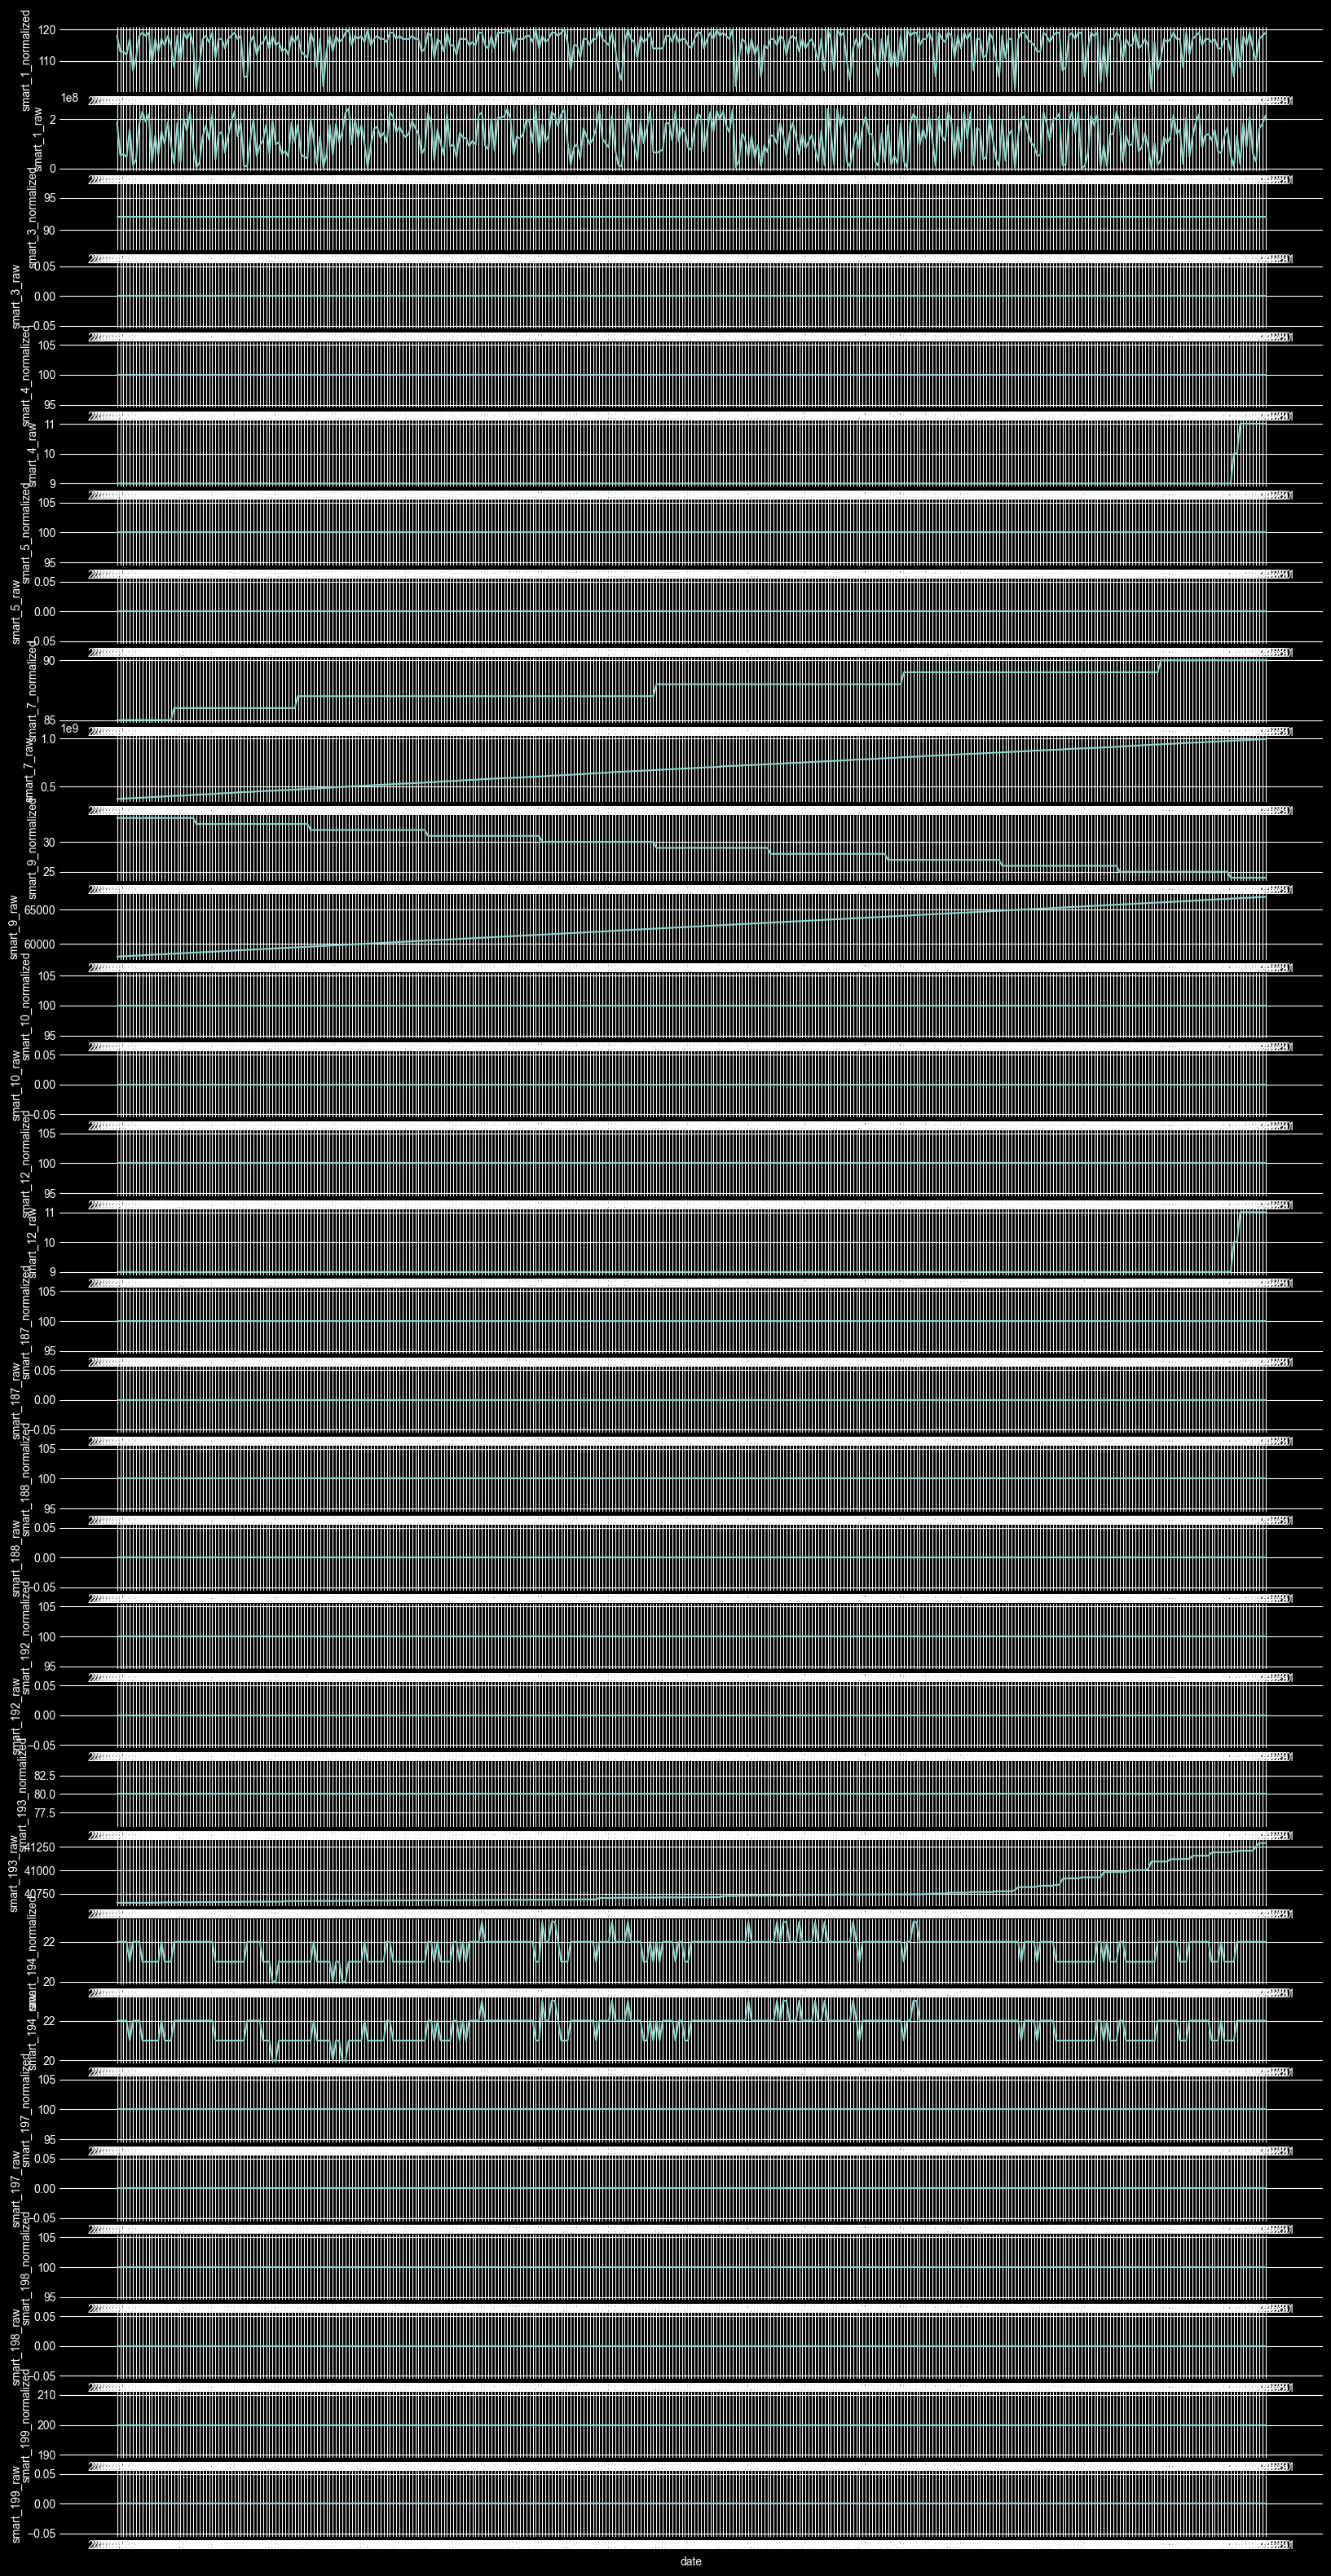

In [18]:
df_S300YQM3 = df_selected.filter(pl.col("serial_number")=="S300YQM3")
df_sorted3 = df_S300YQM3.sort(by='date')


#smart statistics for hard drive with serial number S3010LL5

fig, ax = plt.subplots(32, figsize=(20,40))
for i in range(32):
    graph1 = sns.lineplot(data=df_sorted3, x='date', y=df_sorted3.columns[i+5], ax=ax[i])

plt.savefig("./images/S300YQM3.png")

In [19]:
df_st4000 = df_selected.filter((pl.col("model") == "ST4000DM000"))

In [20]:
st400_dict = fe.create_faildate_dict(df_st4000)

In [21]:
df_st4000 = fe.create_faildate(df_st4000, st400_dict)

In [22]:
df_st4000 = fe.create_target_classification(df_st4000)



In [23]:
df_st4000.write_parquet("./data/2022_data_ST4000DM000.parquet")

### failure rate per hard drive model

In [24]:
df_unique_model = df_selected.select(["serial_number", "model"]).unique()

In [25]:
df_unique_grouped = df_unique_model.groupby("model").agg(pl.col("serial_number").count())

In [26]:
df_unique_grouped

model,serial_number
str,u32
"""TOSHIBA MG07AC...",560
"""Seagate IronWo...",36
"""WDC WD5000LPCX...",52
"""HGST HMS5C4040...",12784
"""HGST HMS5C4040...",1
"""Hitachi HDS5C4...",7
"""ST14000NM0018""",40
"""WDC WD60EFRX""",3
"""HGST HUH721212...",2613


In [27]:
df_unique_sorted = df_unique_grouped.sort(by='serial_number', descending=True)
df_unique_sorted = df_unique_sorted.to_pandas()

In [28]:
df_unique_sorted

,model,serial_number
0,TOSHIBA MG07ACA14TA,38579
1,ST16000NM001G,20677
2,ST12000NM0008,20236
3,ST4000DM000,18940
4,ST8000NM0055,14770
...,...,...
70,Seagate FireCuda 120 SSD ZA500GM10001,2
71,HGST HMS5C4040BLE641,1
72,ST1000LM024 HN,1
73,HGST HDS724040ALE640,1


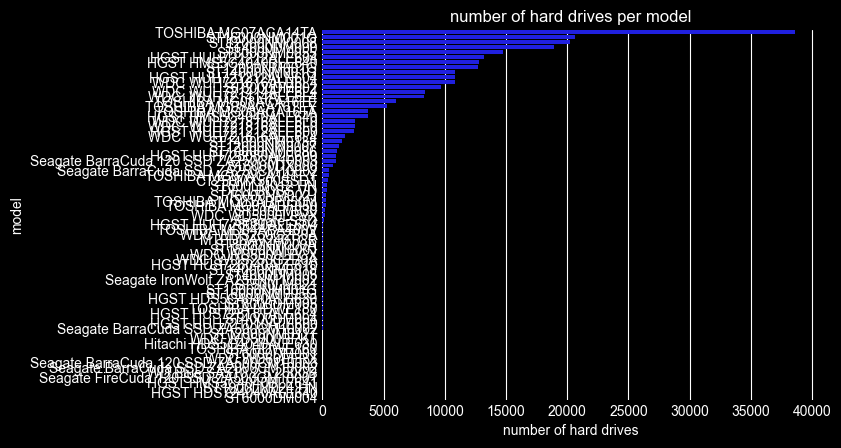

In [29]:
sns.barplot(data=df_unique_sorted, x="serial_number" ,y='model',color="blue")
sns.set(rc={'figure.figsize':(11.7,12.27)})
plt.title("number of hard drives per model")
plt.xlabel("number of hard drives")
plt.yticks();

In [30]:
df_failure = df_selected.filter(pl.col("failure") == 1)

In [31]:
df_failure_sorted = df_failure['model'].value_counts().sort(by='counts', descending=True)
df_failure_sorted =df_failure_sorted.to_pandas()

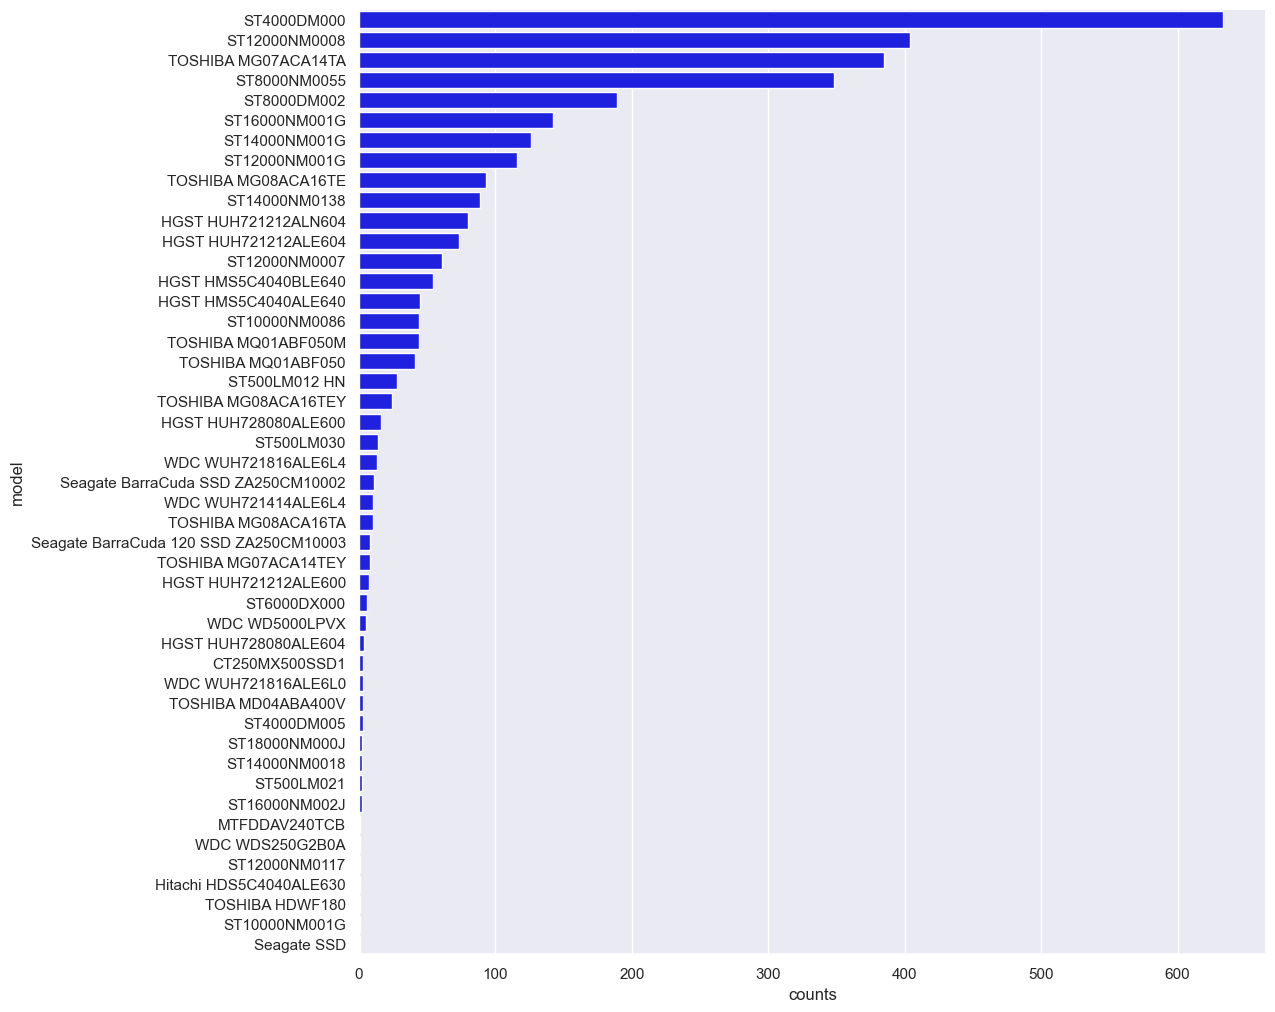

In [32]:
sns.barplot(data=df_failure_sorted, x="counts" ,y='model',color="blue")
sns.set(rc={'figure.figsize':(11.7,12.27)})
plt.yticks();

### failure rate per model

In [33]:
df_fail_per_model = pd.concat([df_failure_sorted, df_unique_sorted], keys="model", axis=1)

In [34]:
df_fail_per_model = df_unique_sorted.join(df_failure_sorted.set_index("model"), on = "model")

In [35]:
df_fail_per_model.head(10)

,model,serial_number,counts
0,TOSHIBA MG07ACA14TA,38579,385.0
1,ST16000NM001G,20677,142.0
2,ST12000NM0008,20236,404.0
3,ST4000DM000,18940,633.0
4,ST8000NM0055,14770,348.0
5,HGST HUH721212ALE604,13241,73.0
6,HGST HMS5C4040BLE640,12784,54.0
7,ST12000NM001G,12742,116.0
8,ST14000NM001G,10878,126.0
9,HGST HUH721212ALN604,10856,80.0


In [36]:
df_fail_per_model["percentage"] = (100/ df_fail_per_model["serial_number"])* df_fail_per_model["counts"]

In [37]:
df_fail_per_model = df_fail_per_model.dropna()

In [38]:
df_fail_per_model = df_fail_per_model.sort_values("percentage", ascending=False)

In [39]:
df_fail_per_model.head(2)

,model,serial_number,counts,percentage
34,TOSHIBA MQ01ABF050M,298,44.0,14.765101
35,TOSHIBA MQ01ABF050,281,41.0,14.590747


create column with manufacturer

In [40]:
manu_dict = {"Toshiba" : ["TOSHIBA"], 
            "Seagate" : ["ST", "Seagate"],
            "HGST" : ["HGST"],
            "Western Digital" : ["WDC"],
            "Hitachi" : ["Hitachi"],
            "Micron":["MTFDD"],
            "Crucial":["CT"]}

In [41]:
toshiba_ex = "TOSHIBA"
seagate_ex = ["ST", "Seagate"]
hgst_ex = "HGST"
wd_ex = "WDC"
hitachi_ex = "Hitachi"
micron_ex = "MTFDD"
crucial_ex = "CT"

In [42]:
for key, value in manu_dict.items():
    print(key, value)

Toshiba ['TOSHIBA']
Seagate ['ST', 'Seagate']
HGST ['HGST']
Western Digital ['WDC']
Hitachi ['Hitachi']
Micron ['MTFDD']
Crucial ['CT']


In [43]:
def re_function(str_var):
    for key, values in manu_dict.items():
        for value in values:
            if re.match(value, str_var):
                return key


In [115]:
df_fail_per_model["manufacturer"] = df_fail_per_model["model"].apply(lambda x: re_function(x))

TypeError: re_function() missing 1 required positional argument: 'str_var'

: 

In [45]:
df_fail_per_model

,model,serial_number,counts,percentage,manufacturer
34,TOSHIBA MQ01ABF050M,298,44.0,14.765101,Toshiba
35,TOSHIBA MQ01ABF050,281,41.0,14.590747,Toshiba
63,Hitachi HDS5C4040ALE630,7,1.0,14.285714,Hitachi
61,ST12000NM0117,10,1.0,10.000000,Seagate
49,ST4000DM005,38,3.0,7.894737,Seagate
31,ST500LM012 HN,422,28.0,6.635071,Seagate
51,ST500LM021,33,2.0,6.060606,Seagate
36,ST500LM030,236,14.0,5.932203,Seagate
22,ST14000NM0138,1611,89.0,5.524519,Seagate
48,ST14000NM0018,40,2.0,5.000000,Seagate


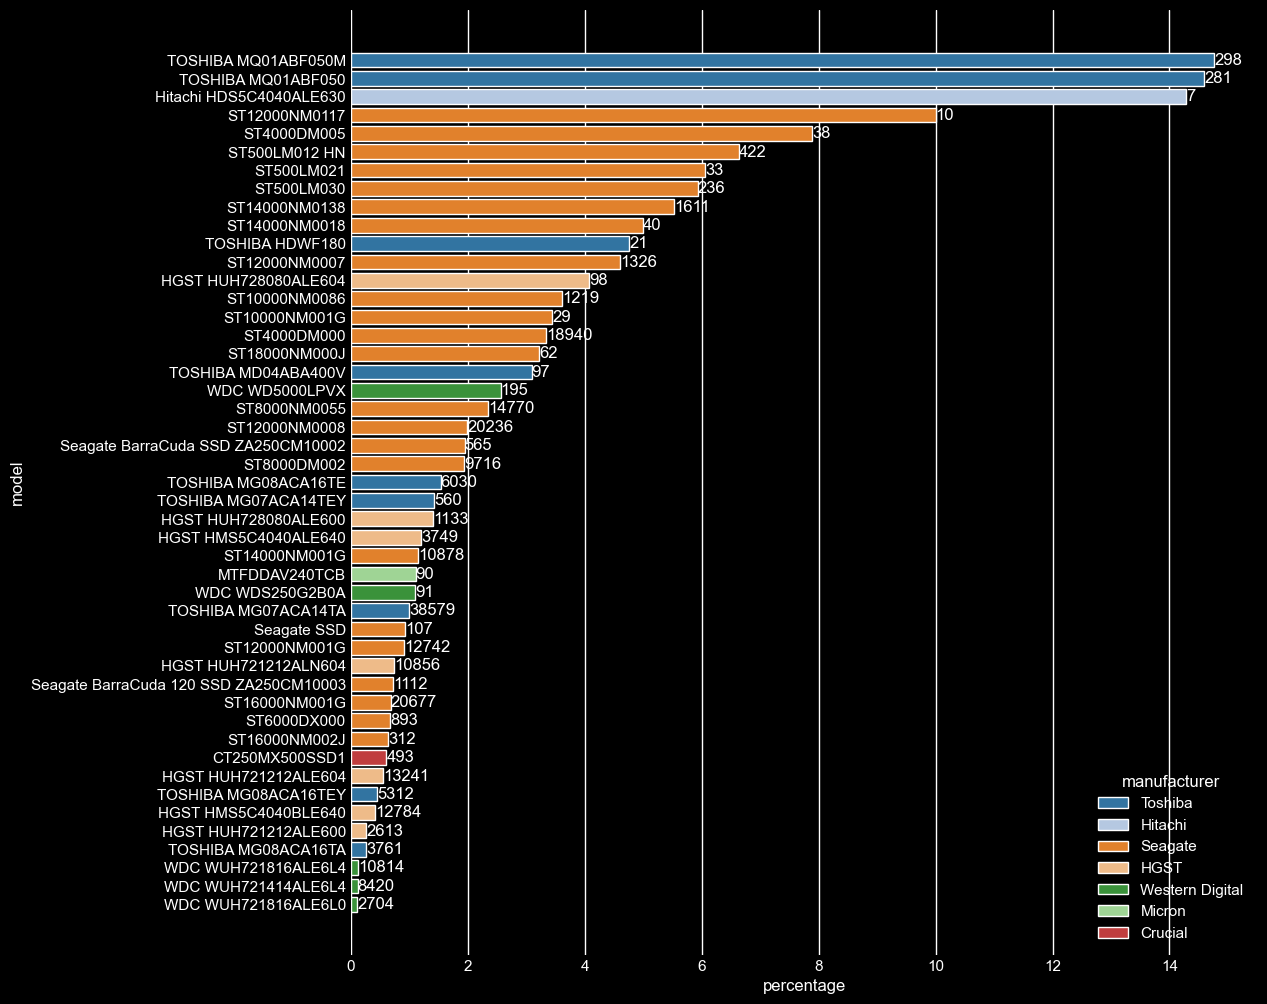

In [55]:
ax = sns.barplot(data=df_fail_per_model, x="percentage", y="model", hue="manufacturer", dodge=False, palette="tab20" )
#plt.plot([], [], ' ', label="298 total Number of hard drives")
for container in ax.containers:
    ax.bar_label(container=container, labels = df_fail_per_model["serial_number"]);
#ax.text
mplcyberpunk.add_glow_effects()


In [113]:
colors = [
    '#ff5349', #red
    '#6eedda',  # teal/cyan
    #'#CA2C92',  # pink
    '#FFFF00',  # yellow
    '#00ff41', # matrix green
    "#584efd" # lilac
]

In [93]:
label_series = df_fail_per_model[df_fail_per_model["serial_number"]>= 100]["serial_number"]
label_list = []
for i in label_series:
    label_list.append(f" {i}") 

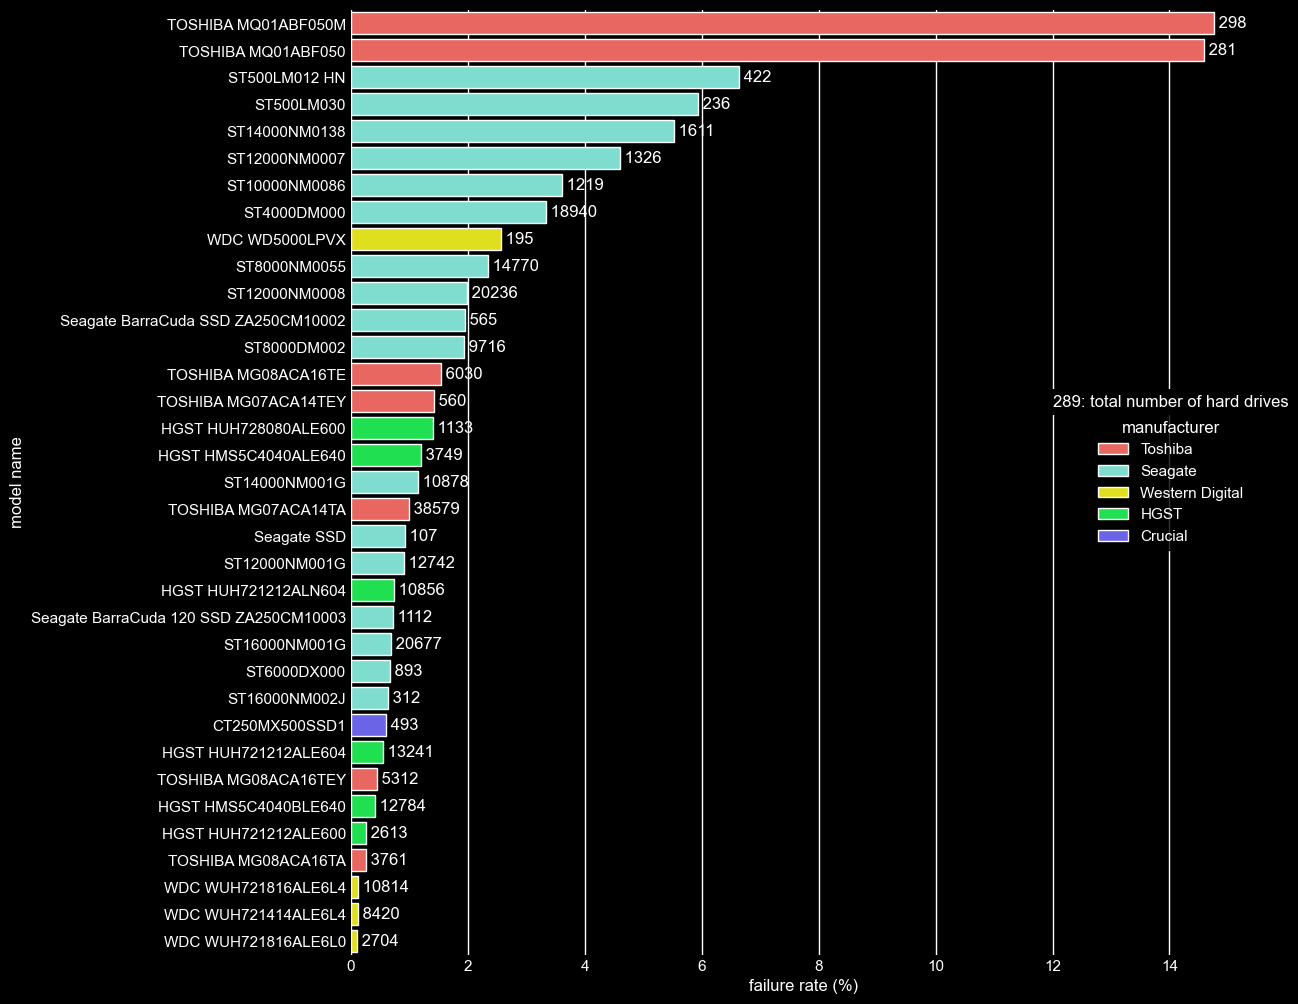

In [114]:
ax = sns.barplot(data=df_fail_per_model[df_fail_per_model["serial_number"]>= 100], x="percentage", y="model", hue="manufacturer", dodge=False,palette= colors)
#add total numbers of hard drives at labels
for container in ax.containers:
    ax.bar_label(container=container, labels = label_list)
#create legend object
l = ax.legend(frameon=1, facecolor= "black", loc="center right", title="manufacturer")
l.get_frame().set_edgecolor('black')
#create custom text box with label explanation
t = ax.text( 12, 14.2, "289: total number of hard drives", )
ax.set_ylabel("model name")
ax.set_xlabel("failure rate (%)")
t.set_bbox({"facecolor":"black",  "linewidth":0})
